In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./CarPrice_Assignment.csv', index_col= 'car_ID')
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 25)

In [4]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
df.CarName = df.CarName.apply(lambda x: x.split(' ')[0])
def replace_name(old,new):
    df.CarName.replace(old,new, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
import wordtodigits

In [8]:
df.cylindernumber = df['cylindernumber'].apply(lambda x: int(wordtodigits.convert(x)))
df.doornumber = df['doornumber'].apply(lambda x: int(wordtodigits.convert(x)))
print(df.cylindernumber.unique())
print(df.doornumber.unique())

[ 4  6  5  3 12  2  8]
[2 4]


In [9]:
print(np.mean(df[df.carbody == 'sedan'].price))
print(np.mean(df[df.carbody == 'hatchback'].price))
print(np.mean(df[df.carbody == 'wagon'].price))
print(np.mean(df[df.carbody == 'hardtop'].price))
print(np.mean(df[df.carbody == 'convertible'].price))

14344.270833333334
10376.652385714286
12371.96
22208.5
21890.5


In [10]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

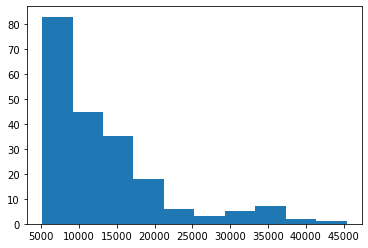

In [11]:
plt.hist(df.price)

In [12]:
def label_car (row):
   if row['carbody'] == 'sedan' :
      return 'Mid'
   if row['carbody'] == 'wagon':
      return 'Mid'
   if row['carbody'] == 'hatchback' :
      return 'Low'
   if row['carbody'] == 'hardtop':
      return 'High'
   if row['carbody'] == 'convertible':
      return 'High'

In [13]:
df['End'] = df.apply(lambda row: label_car(row), axis=1)

In [14]:
df.drop(columns = ['CarName'], axis = 1, inplace = True)

In [15]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,End
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,High
2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,High
3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Low
4,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Mid
5,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Mid


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

<AxesSubplot:xlabel='enginelocation', ylabel='Count'>

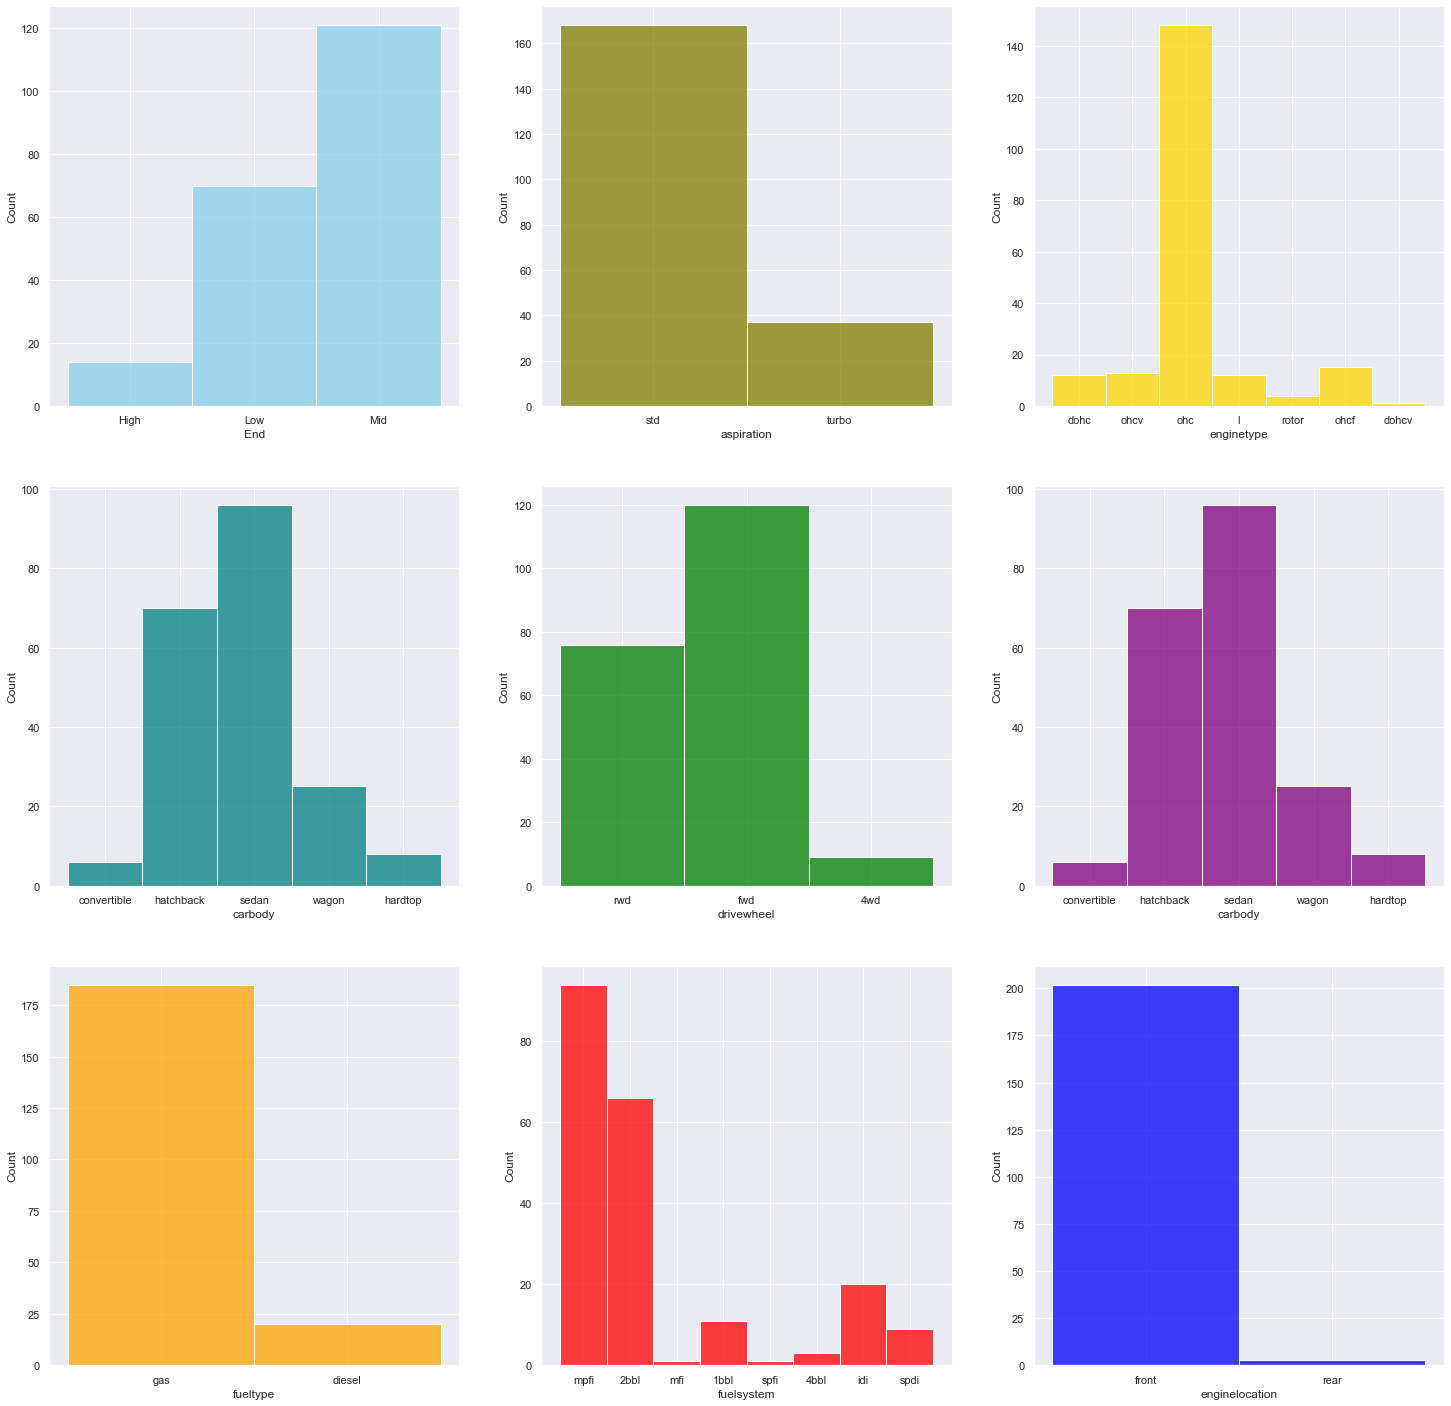

In [17]:
sns.set(style = 'darkgrid')
fig, axs = plt.subplots(3,3, figsize = (25,25))

sns.histplot(data=df, x="End", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="aspiration", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="enginetype", color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="carbody", color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="drivewheel", color="green", ax=axs[1, 1])
sns.histplot(data=df, x="carbody", color="purple", ax=axs[1, 2])
sns.histplot(data=df, x="fueltype", color="orange", ax=axs[2, 0])
sns.histplot(data=df, x="fuelsystem", color="red", ax=axs[2, 1])
sns.histplot(data=df, x="enginelocation", color="blue", ax=axs[2, 2])

In [18]:
dummy = pd.get_dummies(df, drop_first=True)
dummy.shape

(205, 41)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = dummy.drop(columns = ['price'], axis = 1)
y = dummy.price
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 40), (41, 40), (164,), (41,))

<AxesSubplot:>

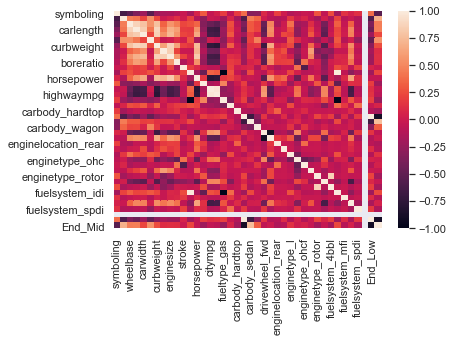

In [21]:
corr = X_train.corr()
sns.heatmap(corr)

In [22]:
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
correlated_features = correlation(data = X_train, threshold = 0.85)
set(correlated_features)

{'End_Low',
 'End_Mid',
 'carlength',
 'curbweight',
 'drivewheel_rwd',
 'enginesize',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fueltype_gas',
 'highwaympg'}

In [24]:
X_train.drop(labels = correlated_features, axis = 1, inplace = True)
X_test.drop(labels = correlated_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

C:\Users\sameer\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((164, 30), (41, 30))

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [26]:
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.fit_transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=100)

In [28]:
model_rf = rf.fit(scaled_X_train,y_train)

In [29]:
feature_names = dummy.columns
for name, importance in zip(feature_names, model_rf.feature_importances_):
    print(name, "=", importance)

symboling = 0.004453258794100498
doornumber = 0.0007244323102062387
wheelbase = 0.04578337013075062
carlength = 0.1456792045983101
carwidth = 0.008527902521274677
carheight = 0.29630943620968997
curbweight = 0.10127795443657409
cylindernumber = 0.0077218073474776185
enginesize = 0.01131618911125526
boreratio = 0.23118054706203542
stroke = 0.014038454546008064
compressionratio = 0.11477324021425617
horsepower = 0.003271750159607212
peakrpm = 0.00045722036444653143
citympg = 0.002908786657914398
highwaympg = 0.0014416391070563228
price = 0.000501892768275445
fueltype_gas = 0.0034356537990986374
aspiration_turbo = 0.0011739930813109778
carbody_hardtop = 0.0002126794148645793
carbody_hatchback = 0.000325166119456551
carbody_sedan = 0.001212209393163667
carbody_wagon = 0.0005215137340471533
drivewheel_fwd = 0.00022276687164086195
drivewheel_rwd = 3.257958140406759e-05
enginelocation_rear = 0.0002527010437480697
enginetype_dohcv = 3.767749352653186e-05
enginetype_l = 0.002132433009770681
eng

<AxesSubplot:>

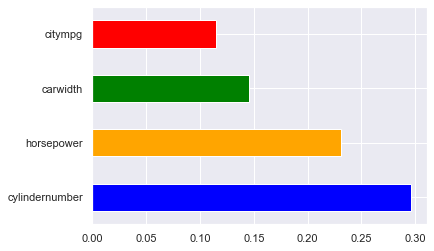

In [30]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh', color=['blue', 'orange', 'green','red'])

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
model_lr = LinearRegression()
model_la =Lasso()
model_ri = Ridge()

In [32]:
model_lr.fit(scaled_X_train,y_train)

LinearRegression()

In [33]:
linear_score = model_lr.score(scaled_X_test,y_test)

In [34]:
random_forest_score = model_rf.score(scaled_X_test,y_test)

In [35]:
model_la.fit(scaled_X_train,y_train)

Lasso()

In [36]:
lasso_score = model_la.score(scaled_X_test,y_test)

In [37]:
model_ri.fit(scaled_X_train, y_train)
ridge_Score = model_ri.score(scaled_X_test,y_test)

In [38]:
from xgboost import XGBRegressor 
xgb = XGBRegressor()
xgb.fit(scaled_X_train, y_train)
xgb_score = xgb.score(scaled_X_test,y_test)

In [39]:
data = {'Linear Regression':linear_score,'Lasso':lasso_score,'Random Forest':random_forest_score,
       'Ridge':ridge_Score,'XGB':xgb_score}

In [40]:
Score = pd.DataFrame({'Model':['Linear Regression','Lasso','Ridge','Random Forest','XGB'],
                      'Scores':[linear_score,lasso_score,ridge_Score,random_forest_score,xgb_score]})
Score

,Model,Scores
0,Linear Regression,0.740345
1,Lasso,0.741349
2,Ridge,0.750639
3,Random Forest,0.819754
4,XGB,0.840657


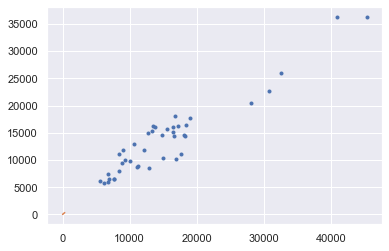

In [41]:
y_pred = xgb.predict(scaled_X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfect predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()